### Sumário

- Filtros FIR ou média móvel
- Observando a resposta ao impulso de um filtro FIR
- Filtrando um sinal com um filtro FIR
- Projeto de um filtro passa baixa com filtros FIR
- Aplicando o filtro projetado

### Filtros FIR ou média móvel

Para começar vamos definir o que são os filtros FIR e algumas características. Matematicamente a expressão de um filtro FIR é:

$y(n) = \sum_{i=0}^ph_{i}x(n-i)$ onde $p$ é o número de coeficientes do filtro menos 1.

Vamos expandir a somatária e fazer $p = 2$ para ver melhor o que esta acontecendo na equação acima:

$y(n) = h_{0}x(n) + h_{1}x(n-1) + h_{2}x(n-2)$

Podemos notar que o filtro faz uma combinação linear de seus coeficientes $h_{0}, h_{1}$ e $h_{2}$ com amostras do sinal de entrada $x$ para diferentes índices de tempo, mais precisamente, com a amostra atual (índice n) e as duas amostras anteriores. É justamente o fato de termos essa combinação linear que faz com o que filtro também seja chamado de média móvel, no qual, o termo média se dá ao fato de estarmos fazendo um média ponderada das amostras do sinal, já o termo móvel vem do fato de deslocarmos as amostradas usadas.

Para exemplificar, vamos cacular algumas saídas do filtro para diferentes valores de n.

$y(0) = h_{0}x(0) + h_{1}x(-1) + h_{2}x(-2)$

$y(1) = h_{0}x(1) + h_{1}x(0) + h_{2}x(-1)$

$y(2) = h_{0}x(2) + h_{1}x(1) + h_{2}x(0)$

Vemos que as amostras usadas no cálculo da saída do filtro em um dado índice de tempo são reutilizadas no cálculo das seguintes saídas do filtro, porém multiplicas por outro coeficiênte do filtro. Por isso, dizemos que os filtros FIR possuem memória, no exemplo, temos uma memória de tamanho 3, pois uma mesma amostra de entrada é usada no cálculo de 3 saídas consecutivas do filtro antes de ser descartada. No nosso exemplo, essa amostra corresponde ao termo $x_{0}$ multiplicados pelos termos $h_{0}$ na primeira saída, $h_{1}$ na segunda e $h_{2}$ na terceira. 

Além disso, durante o cálculo das primeiras saídas do filtro, y(0) e y(1), precisamos de amostras do sinal x(n) em tempos com índices negtivos, de fato se considerarmos que nosso sinal x começa no índice 0, não teremos as amostras dos índices $x(-1)$ e $x(-2)$ disponíveis. Para resolver esse problema uma prática comum é considerar que tais amostras são 0 para iniciarmos o processo de filtragem.

Vamos ver como usar filtros FIR usando numpy.



### Observando a resposta ao impulso de um filtro FIR

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
#Filtro FIR
h = np.array([2, 4, 3])

Primeiro vamos observar a resposnta impulso do filtro

In [25]:
x = np.array([1, 0, 0])
y = np.convolve(h, x)

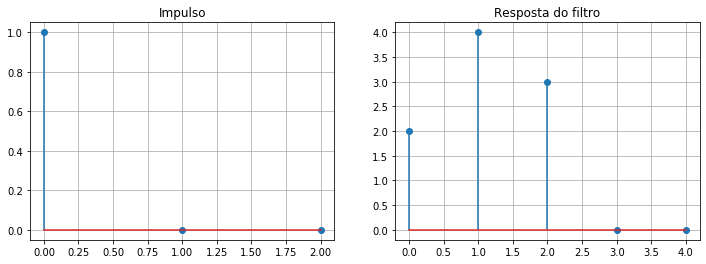

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))
axs[0].stem(x, use_line_collection=True)
axs[0].set_title("Impulso")
axs[0].grid()
axs[1].stem(y, use_line_collection=True)
axs[1].set_title("Resposta do filtro")
axs[1].grid()

Como discutido anteriormente, a entrada $x(0)$ é usada durante 3 instantes de tempo, que corresponde a mémoria do filtro. Além disso, vemos que a resposta do filtro pode ser calculado pela pela operação de convolução entre o sinal de entrada e a resposta a impulso do filtro.

Devido a memôria limitada do fitlro, um filtro FIR será sempre estável no sentido BIBO (bounded input bounded output), pois sua saída nao poderá crescer de forma indefinida. Vamos ilustrar esse efeito ao isso ao filtrar um sinal constante.

In [5]:
x = np.ones((10, ))
y = np.convolve(h, x)

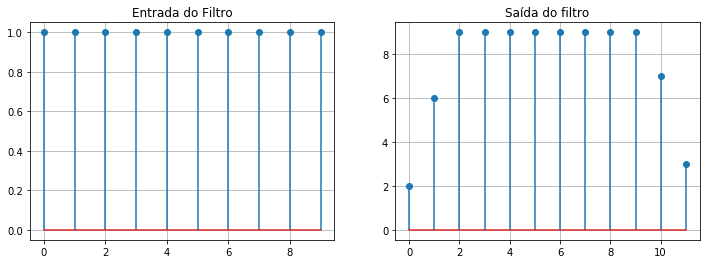

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))
axs[0].stem(x, use_line_collection=True)
axs[0].set_title("Entrada do Filtro")
axs[0].grid()
axs[1].stem(y, use_line_collection=True)
axs[1].set_title("Saída do filtro")
axs[1].grid()

Após removermos o sinal de entrada, o filtro ainda responderá por alguns instantes, mas sua saída decaira quando o efeito de sua memória acabar.

### Filtrando um sinal com um filtro FIR

Para isso, vamos primeiro construir um sinal com duas componentes de frequências, uma com 10 Hz e outra com 90 Hz e frequências de amostragem iqual a 1000 Hz.

In [27]:
dt = 0.001 # tempo de amostragem
Fs = 1/dt  # frequência de amostragem 1000 Hz
f1 = 10    # frequência sinal 1, 10 Hz
f2 = 90    # frequência sinal 2, 90 Hz

In [28]:
t = np.arange(0, 1, dt)
y = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)

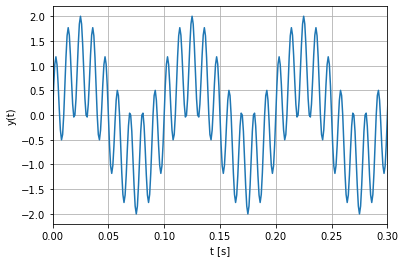

In [29]:
plt.plot(t, y)
plt.ylabel("y(t)")
plt.xlabel("t [s]")
plt.xlim([0, 0.3])
plt.grid()

Vamos agora obter um filtro FIR passa baixa com frequência de corte igual 50 Hz, de modo a eliminar a componente de maior frequência. Para isso, vamos usar a função firwin que nos possibilita de modo fácil obter os coeficientes do filtro especificando somente a frequência de corte (caso de um filtro passa baixa) e o número de coeficiêntes.

### Projeto de um filtro passa baixa com filtros FIR

In [30]:
from scipy import signal

In [31]:
fcut = 50 # frequência de corte
filter_length = 100

In [32]:
hcoef = signal.firwin(filter_length, fcut, fs=Fs)
w, h = signal.freqz(hcoef)

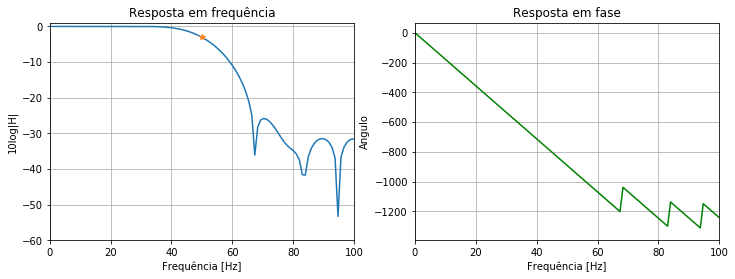

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))
axs[0].plot((Fs/2)*w/np.pi, 20 * np.log10(np.sqrt(abs(h))))
axs[0].plot(fcut, -3, '*')
axs[0].set_ylim([-60, 1])
axs[0].set_xlim([0, 100])
axs[0].set_title("Resposta em frequência")
axs[0].set_xlabel("Frequência [Hz]")
axs[0].set_ylabel("10log|H|")
axs[0].grid()

angles = np.unwrap(np.angle(h))
axs[1].plot((Fs/2)*w/np.pi, 180*angles/np.pi, 'g')
axs[1].set_title("Resposta em fase")
axs[1].set_ylabel("Angulo")
axs[1].set_xlabel("Frequência [Hz]")
axs[1].set_xlim([0, 100])
axs[1].grid()

Olhando a resposta em amplitude do filtro, vamos que a frequência de corte, ocorre exatamente no ponto em que a potência da saída diminui em 3 dB como esperado. Já o quão rápido será o roll-off do filtro irá depender do número de coeficientes usado, no nosso exemplo, usamos um filtro com 100 coeficientes.

### Aplicando o filtro projetado

Por fim, vamos aplicar o filtro projeto no sinal e ver que a componente de frequência em 90 Hz é removida.

In [34]:
freq = np.linspace(0, Fs/2, len(y)//2+1)
y_filtered = np.convolve(y, hcoef, mode='same')

In [35]:
spec = np.abs(np.fft.rfft(y_filtered, n=len(y_filtered)))
spec /= np.sum(np.abs(spec))

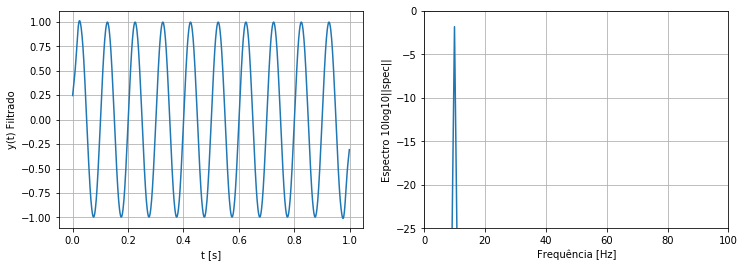

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))
axs[0].plot(t, y_filtered)
axs[0].set_ylabel("y(t) Filtrado")
axs[0].set_xlabel("t [s]")
axs[0].grid()
axs[1].plot(freq, 10*np.log10(spec))
axs[1].set_ylim([-25, 0])
axs[1].set_xlim([0, 100])
axs[1].set_ylabel("Espectro 10log10||spec||")
axs[1].set_xlabel("Frequência [Hz]")
axs[1].grid()

Apesar de inicialmente ambas as componentes terem a mesma potência, vamos agora somente a componente de interesse está presente. Isso pode ser visto tanto no sinal no domínio do tempo, quanto no domínio da frequência, obtido com a transformada de Fourier

### Conclusão

Neste tópico discutimos:

- A formulação matématica de um filtro FIR
- Por que este tipo de filtro também é chamado de média móvel
- Como resolver o problema das amostras com índices de tempo negativo para iniciar a filtragem
- Como aplicar este filtro usando numpy
- A garatina de estabilidade de um filtro FIR e sua memória finita
- Como projetar um filtro passa baixa usando um filtro FIR
- Um experimento no qual filtramos a componênte de maior frequência de um sinal